In [746]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from itertools import islice
import torch.nn.functional as F
import torch.nn as nn
import numpy as np


train_set = pd.read_csv('/content/sample_data/mnist_train_small.csv')
test_set = pd.read_csv('/content/sample_data/mnist_test.csv')

In [747]:
import torchvision
from torchvision import transforms

In [748]:
print(torch.__version__)

print("GPU Available:", torch.cuda.is_available())
if torch.cuda.is_available():
 device = torch.device("cuda:0")
else:
 device = "cpu"
print(device)


2.0.1+cu118
GPU Available: True
cuda:0


In [749]:
train_value = torch.tensor(train_set.values)
test_value = torch.tensor(test_set.values)

training_set = torch.cat([train_value,test_value])
print(training_set.shape)

torch.Size([29998, 785])


In [750]:
label = training_set.T[0]
train_set = training_set.T[1:]
train_set = train_set.T
train_set_res = train_set.view(29998,28,28)

label = label.reshape(-1,1)

In [751]:
print(train_set_res[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28,  59,  50,
           0,  23,   0,   0,  32, 134, 180, 254, 206,   8,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [752]:
to_tensor = transforms.ToTensor()

In [753]:
normalize = transforms.Normalize(mean=(0.5), std=(0.5))

In [754]:
train_set_res.shape
#train_set_res = train_set_res.view(29998,1,28,28)

torch.Size([29998, 28, 28])

In [755]:
train_set_res = train_set_res.float()/255

In [756]:
train_set_res = train_set_res.view(29998,1,28,28)

In [757]:
print(train_set_res[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [758]:
train_set_res = normalize(train_set_res)

In [759]:
print(train_set_res[0])

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [760]:
print(train_set_res[0])

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [761]:
join_dataset = torch.utils.data.TensorDataset(train_set_res,label.squeeze(1))

In [762]:
train_set = DataLoader(join_dataset,batch_size = 64)

In [763]:
def sample_latent_z(batch_size,z_size,type):
  if type =="normal":
    z = torch.randn(batch_size,z_size)
  else:
    z = torch.rand(batch_size,z_size) *2 - 1
  return z

In [764]:
def create_generator():
  model = nn.Sequential(
      nn.Linear(20,100),
      nn.LeakyReLU(0.2),
      nn.Linear(100,784),
      nn.Tanh()
  )
  return model

In [765]:
def create_discriminator():
  model = nn.Sequential(
      nn.Linear(784,100),
      nn.LeakyReLU(0.2),
      nn.Linear(100,1),
      nn.Sigmoid()
  )
  return model

In [766]:
gen_model = create_generator().to(device)
disc_model = create_discriminator().to(device)

In [767]:
loss_fn = nn.BCELoss()
g_optimizer = torch.optim.Adam(gen_model.parameters(),0.001)
d_optimizer = torch.optim.Adam(disc_model.parameters(),0.0006)

In [768]:
#define hàm train cho gen
def g_train(x):
  gen_model.zero_grad()
  batch_size = x.size(0)
  input_z = sample_latent_z(batch_size,20,"normal").to(device)
  g_label_real = torch.ones(batch_size,1,device = device)

  g_output = gen_model(input_z)
  d_proba_fake = disc_model(g_output)

  g_loss = loss_fn(d_proba_fake, g_label_real)
  g_loss.backward()
  g_optimizer.step()
  return g_loss.detach().item()

In [769]:
def d_train(x):
  disc_model.zero_grad()
  batch_size = x.size(0)
  x = x.view(batch_size,-1).to(device)
  #train with real batch
  d_label_real = torch.ones(batch_size,1,device = device)
  d_real = disc_model(x)
  d_real_loss = loss_fn(d_real,d_label_real)

  #train with fake batch
  input_z = sample_latent_z(batch_size,20,"normal").to(device)
  g_output = gen_model(input_z)
  g_label_fake = torch.zeros(batch_size,1,device = device)
  d_fake = disc_model(g_output)
  d_fake_loss = loss_fn(d_fake,g_label_fake)

  d_loss = d_real_loss + d_fake_loss
  d_loss.backward()
  d_optimizer.step()
  return d_real_loss.detach(),d_fake_loss.detach(), d_loss.detach().item()


In [770]:
fixed_z = sample_latent_z(64,20,"normal").to(device)
def create_samples(gen_model,input_z):
  g_output = gen_model(input_z)
  image = torch.reshape(g_output,(64,*(28,28)))
  return (image+1)/2.0

In [771]:
num_epochs = 50
epoch_samples = []
all_d_loss = []
all_g_loss = []
all_d_real = []
all_d_fake = []

for epoch in range(num_epochs):
  d_losses,g_losses = [],[]
  d_vals_real, d_vals_fake = [], []
  for i, (x, _) in enumerate(train_set):
    d_real,d_fake,d_loss = d_train(x.float())
    d_losses.append(d_loss)
    g_losses.append(g_train(x))
    d_vals_real.append(d_real.mean().cpu())
    d_vals_fake.append(d_fake.mean().cpu())

  all_d_loss.append(torch.tensor(d_losses).mean())
  all_g_loss.append(torch.tensor(g_losses).mean())
  all_d_real.append(torch.tensor(d_vals_real).mean())
  all_d_fake.append(torch.tensor(d_vals_fake).mean())

  print(f'Epoch {epoch:03d} | Avg Losses >>'
  f' G/D {all_g_loss[-1]:.4f}/{all_d_loss[-1]:.4f}'
  f' [D-Real: {all_d_real[-1]:.4f}'
  f' D-Fake: {all_d_fake[-1]:.4f}]')

  epoch_samples.append(
  create_samples(gen_model, fixed_z).detach().cpu().numpy()
  )




Epoch 000 | Avg Losses >> G/D 1.4512/0.6441 [D-Real: 0.1410 D-Fake: 0.5031]
Epoch 001 | Avg Losses >> G/D 2.0048/0.6847 [D-Real: 0.2600 D-Fake: 0.4247]
Epoch 002 | Avg Losses >> G/D 2.3342/0.6729 [D-Real: 0.3062 D-Fake: 0.3667]
Epoch 003 | Avg Losses >> G/D 2.1447/0.7013 [D-Real: 0.3395 D-Fake: 0.3619]
Epoch 004 | Avg Losses >> G/D 1.7299/0.9769 [D-Real: 0.4875 D-Fake: 0.4894]
Epoch 005 | Avg Losses >> G/D 1.4579/1.1196 [D-Real: 0.5790 D-Fake: 0.5406]
Epoch 006 | Avg Losses >> G/D 1.4126/1.1895 [D-Real: 0.6059 D-Fake: 0.5837]
Epoch 007 | Avg Losses >> G/D 1.3595/1.3569 [D-Real: 0.6897 D-Fake: 0.6672]
Epoch 008 | Avg Losses >> G/D 1.2945/1.2505 [D-Real: 0.6429 D-Fake: 0.6076]
Epoch 009 | Avg Losses >> G/D 1.2328/1.2514 [D-Real: 0.6429 D-Fake: 0.6085]
Epoch 010 | Avg Losses >> G/D 1.1598/1.4228 [D-Real: 0.7397 D-Fake: 0.6831]
Epoch 011 | Avg Losses >> G/D 1.1391/1.4073 [D-Real: 0.7335 D-Fake: 0.6738]
Epoch 012 | Avg Losses >> G/D 1.1991/1.3158 [D-Real: 0.6910 D-Fake: 0.6248]
Epoch 013 | 

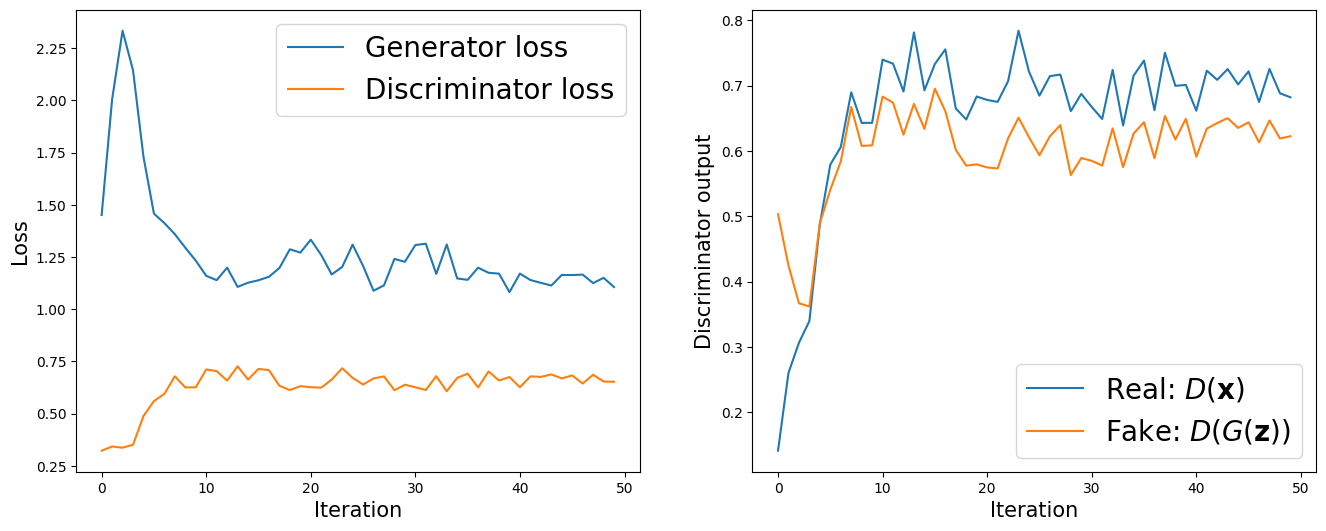

In [772]:
import itertools

fig = plt.figure(figsize=(16, 6))
## Plotting the losses
ax = fig.add_subplot(1, 2, 1)
plt.plot(all_g_loss, label='Generator loss')
half_d_losses = [all_d_loss/2 for all_d_loss in all_d_loss]
plt.plot(half_d_losses, label='Discriminator loss')
plt.legend(fontsize=20)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Loss', size=15)
## Plotting the outputs of the discriminator
ax = fig.add_subplot(1, 2, 2)
plt.plot(all_d_real, label=r'Real: $D(\mathbf{x})$')
plt.plot(all_d_fake, label=r'Fake: $D(G(\mathbf{z}))$')
plt.legend(fontsize=20)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Discriminator output', size=15)
plt.show()

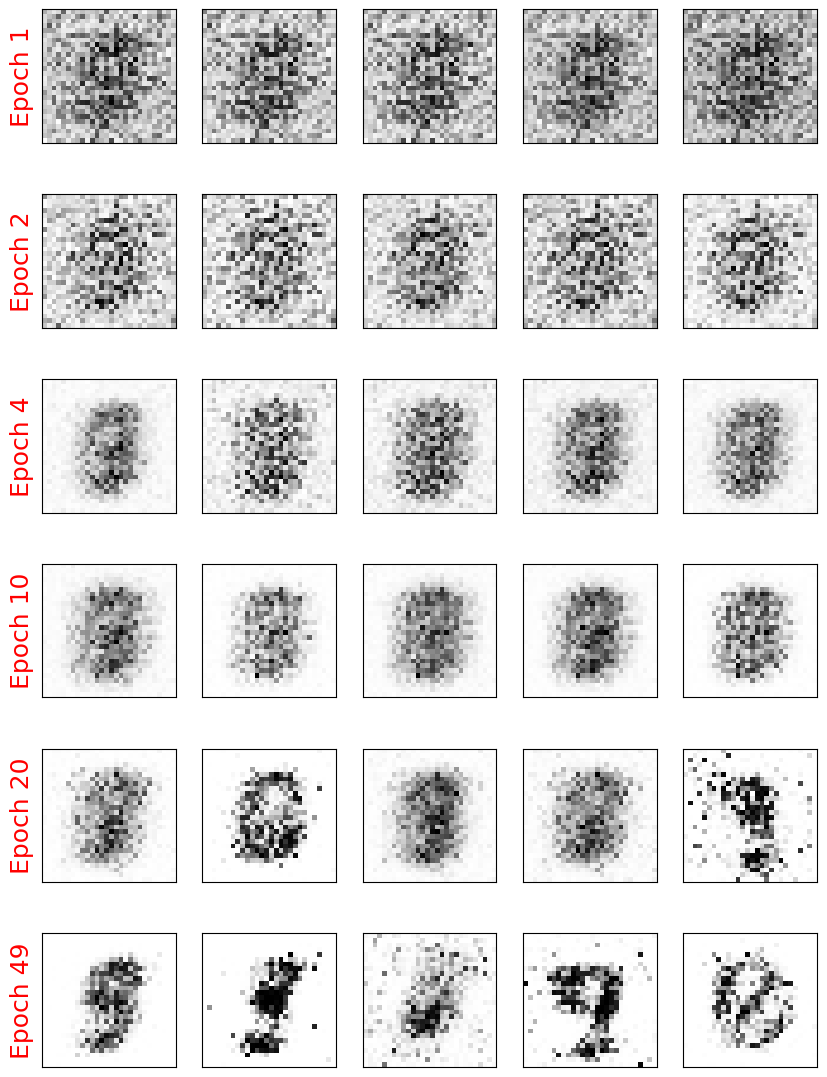

In [776]:
selected_epochs = [1, 2, 4, 10, 20,49]
fig = plt.figure(figsize=(10, 14))
for i,e in enumerate(selected_epochs):
  for j in range(5):
    ax = fig.add_subplot(6, 5, i*5+j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    if j == 0:
      ax.text(
        -0.06, 0.5, f'Epoch {e}',
        rotation=90, size=18, color='red',
        horizontalalignment='right',
        verticalalignment='center',
        transform=ax.transAxes
      )
    image = epoch_samples[e-1][j]
    ax.imshow(image, cmap='gray_r')
plt.show()

In [778]:
path = 'mnist_gen.pt'
torch.save(gen_model, path)

path_2 = 'mnist_disc.pt'
torch.save(disc_model, path_2)
